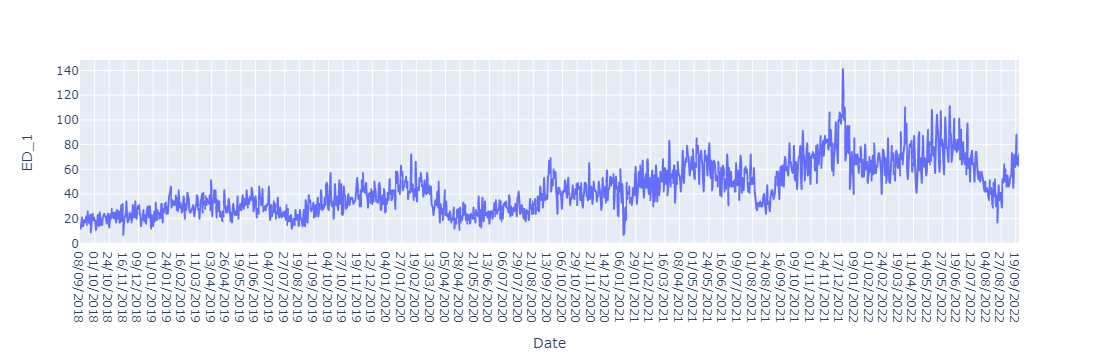

In [6]:
import plotly.express as px
import pandas as pd

madrid = pd.read_csv("Madrid_database.csv")

# Create the line plot
fig = px.line(madrid, x='Date', y='ED_1')

# Update the y-axis tick values to intervals of 20
fig.update_yaxes(tickvals=list(range(0, 141, 20)))

# Show the plot
fig.show()


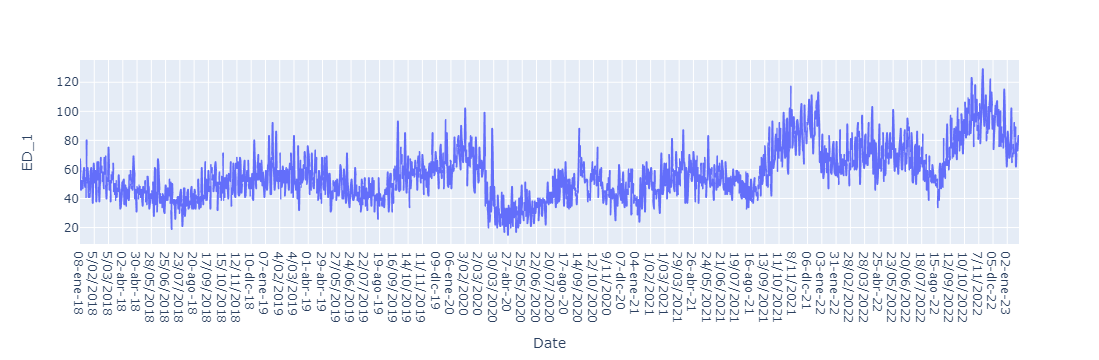

In [44]:
import plotly.express as px
import pandas as pd

Pamplona = pd.read_csv("Pamplona2_database.csv")

# Create the line plot
fig = px.line(Pamplona, x='Date', y='ED_1')

# Update the y-axis tick values to intervals of 20
fig.update_yaxes(tickvals=list(range(0, 141, 20)))

# Show the plot
fig.show()

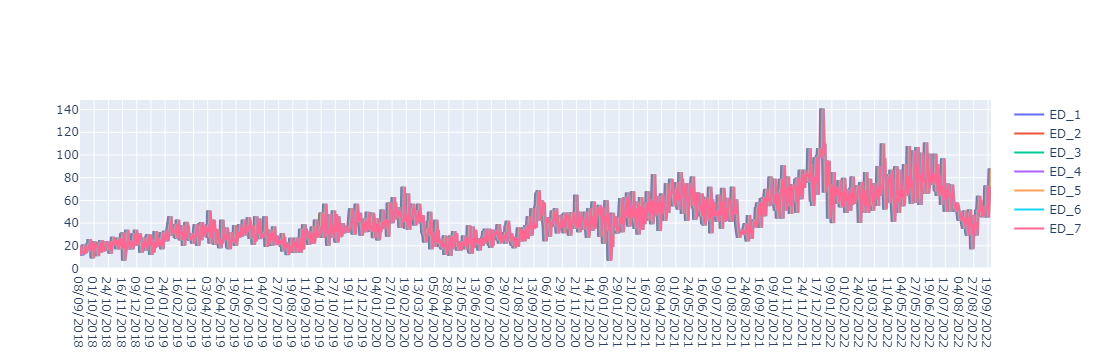

In [31]:
import plotly.graph_objects as go

# Define the y-axis frequency ticks
y_ticks = list(range(0, 141, 20))

# Plot past emergency room visits (ED_1 to ED_7) against time
fig = go.Figure()
for i in range(1, 8):
    fig.add_trace(go.Scatter(x=df['Date'], y=df[f'ED_{i}'], mode='lines', name=f'ED_{i}'))

# Set the y-axis frequency ticks
fig.update_layout(yaxis=dict(tickvals=y_ticks))

fig.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4816\1282511265.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



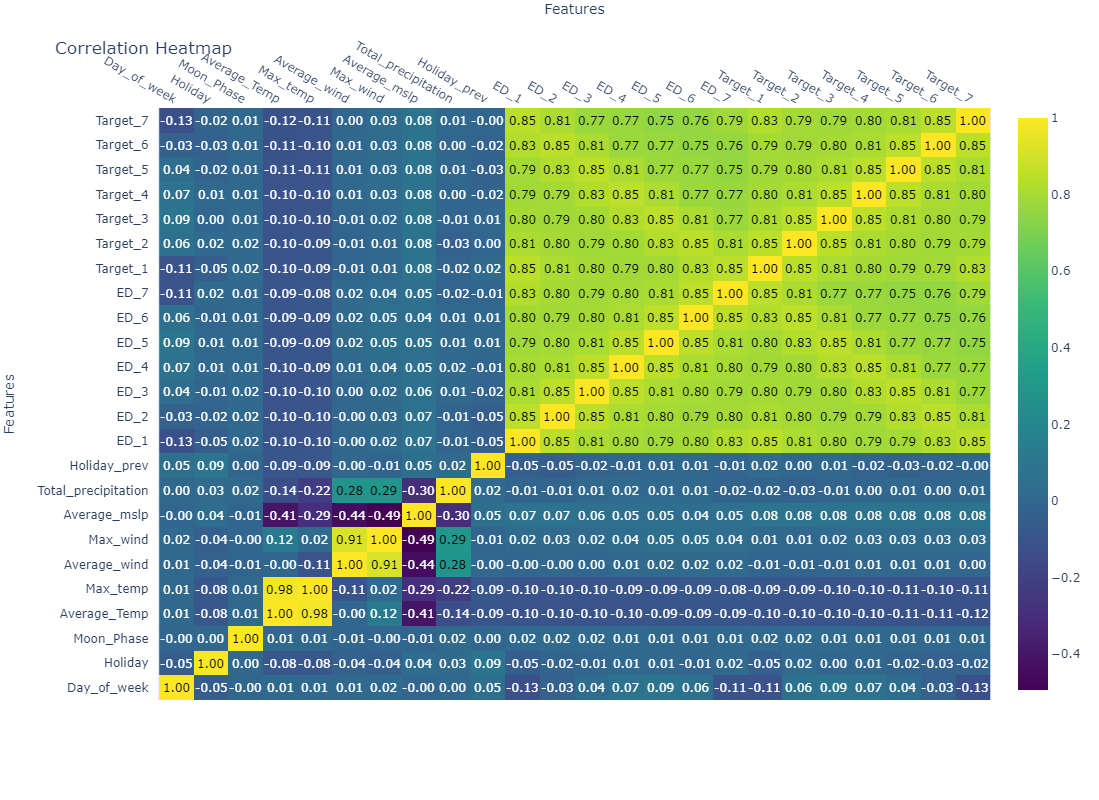

In [35]:
import plotly.figure_factory as ff

# Calculate correlation matrix
corr_matrix = madrid.corr()

# Format correlation matrix values to 2 decimal places
corr_matrix_formatted = corr_matrix.applymap(lambda x: "{:.2f}".format(x))

# Plot correlation heatmap
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  annotation_text=corr_matrix_formatted.values,
                                  colorscale='Viridis',
                                  showscale=True)

# Customize layout
fig.update_layout(
    title="Correlation Heatmap",
    width=1000,  # Set width of the plot
    height=800,  # Set height of the plot
    xaxis=dict(title="Features"),
    yaxis=dict(title="Features"),
    margin=dict(l=100, r=100, t=100, b=100),  # Adjust margins
)

# Show plot
fig.show()


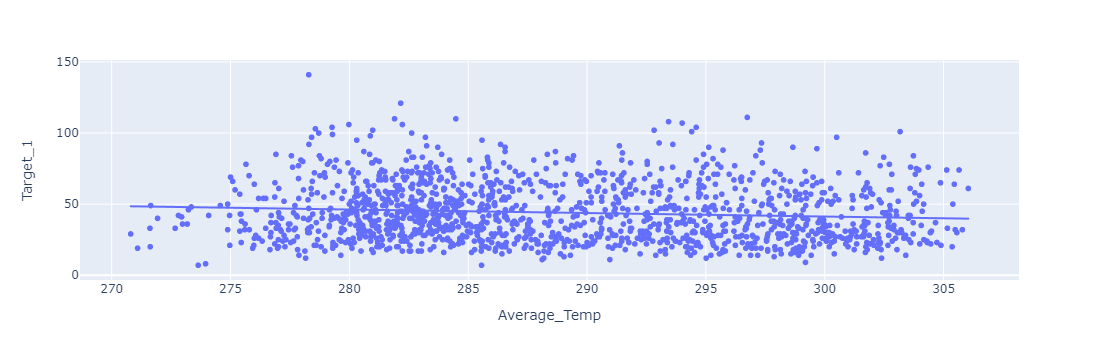

In [22]:
# Scatter plot of Average_Temp vs Target_1
fig = px.scatter(madrid, x='Average_Temp', y='Target_1', trendline='ols')
fig.show()

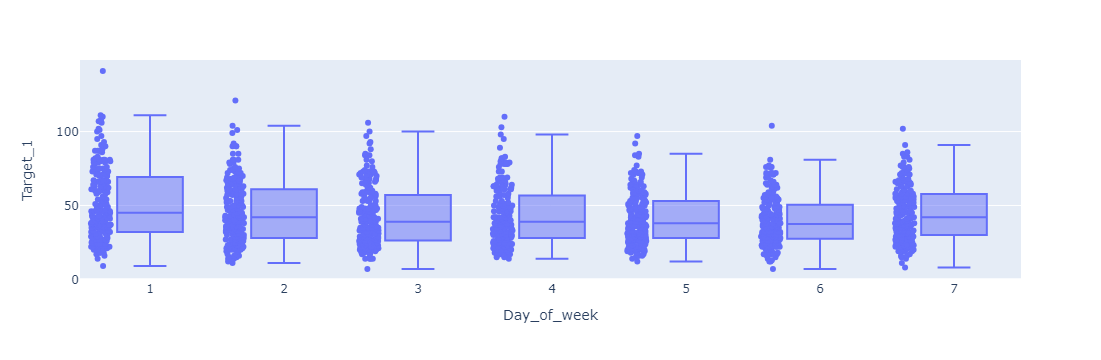

In [21]:
# Box plot of Target_1 for each day of the week
fig = px.box(madrid, x='Day_of_week', y='Target_1', points='all')
fig.show()

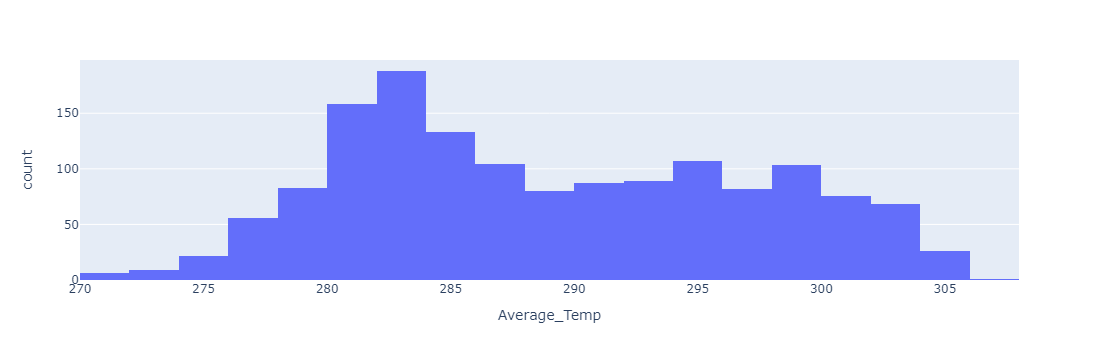

In [20]:
# Histogram of Average_Temp
fig = px.histogram(madrid, x='Average_Temp', nbins=20)
fig.show()

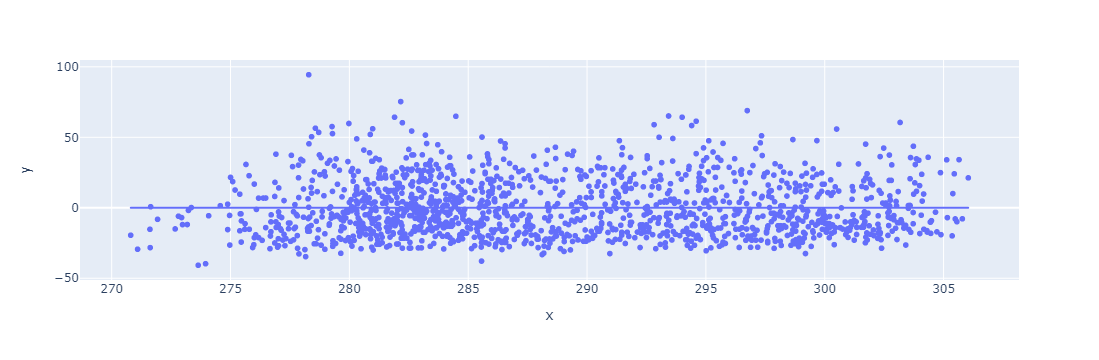

In [39]:
import statsmodels.api as sm

# Fit regression model
X = madrid[['Average_Temp']]
y = madrid['Target_1']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Plot residual plot
fig = px.scatter(x=df['Average_Temp'], y=model.resid, trendline='ols')
fig.show()


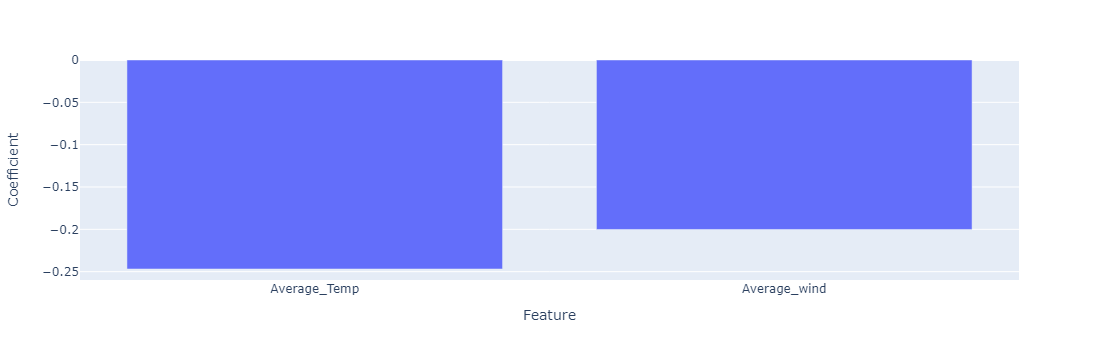

In [40]:
# Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(madrid[['Average_Temp', 'Average_wind']], madrid['Target_1'])

# Plot coefficients
coefficients = model.coef_
features = ['Average_Temp', 'Average_wind']
fig = px.bar(x=features, y=coefficients, labels={'x':'Feature', 'y':'Coefficient'})
fig.show()


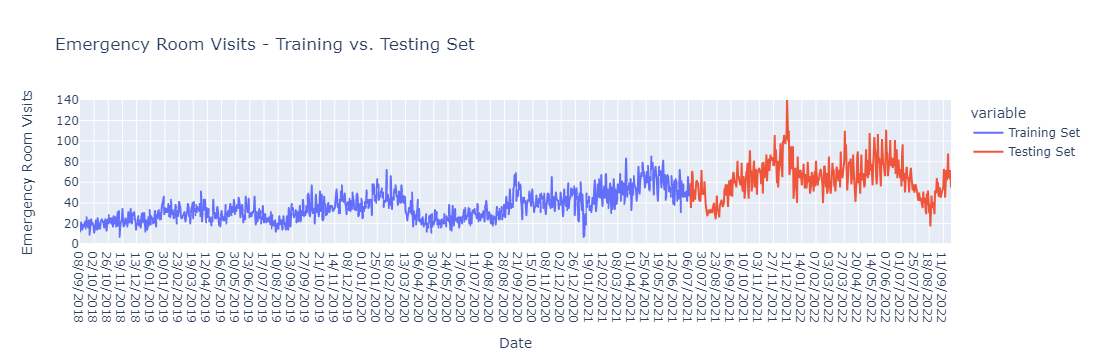

In [65]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the dataset
madrid = pd.read_csv("Madrid_database.csv", header=0)

# Separate features (X) and target variable (y)
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
split_index = int(0.7 * len(madrid))
train_df = madrid.iloc[:split_index]
test_df = madrid.iloc[split_index:]

# Melt the DataFrame to have 'Date' as a column
train_melted = train_df.reset_index().melt(id_vars='Date', value_vars=['Target_1'])
test_melted = test_df.reset_index().melt(id_vars='Date', value_vars=['Target_1'])

# Plot using Plotly Express
fig = px.line(train_melted, x='Date', y='value', color='variable', line_group='variable', 
              labels={'Date': 'Date', 'value': 'Emergency Room Visits'}, 
              title='Emergency Room Visits - Training vs. Testing Set')
fig.add_scatter(x=test_melted['Date'], y=test_melted['value'], mode='lines', name='Testing Set')

# Update legend labels
fig.update_traces(name='Training Set', selector=dict(name='Target_1'))

# Set y-axis range and ticks
fig.update_yaxes(range=[0, 140], tickvals=list(range(0, 141, 20)), ticktext=list(range(0, 141, 20)))

fig.show()


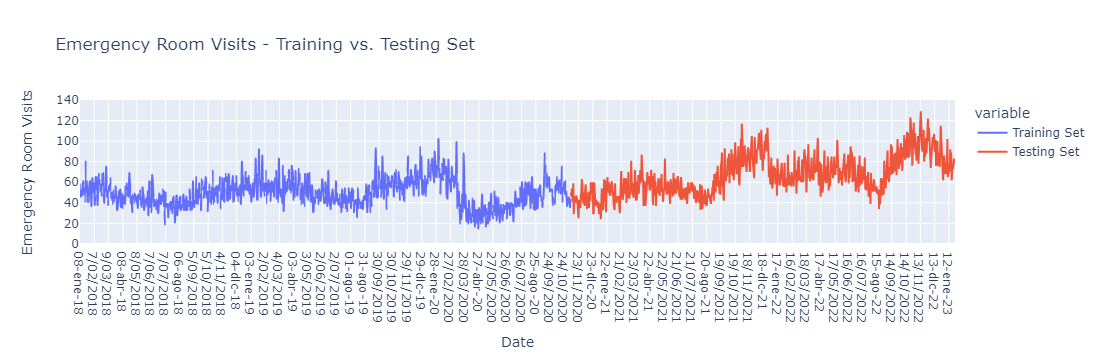

In [66]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
Pamplona = pd.read_csv("Pamplona2_database.csv", header=0)

# Separate features (X) and target variable (y)
X = Pamplona.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = Pamplona[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
split_index = int(0.7 * len(madrid))
train_df = Pamplona.iloc[:split_index]
test_df = Pamplona.iloc[split_index:]

# Melt the DataFrame to have 'Date' as a column
train_melted = train_df.reset_index().melt(id_vars='Date', value_vars=['Target_1'])
test_melted = test_df.reset_index().melt(id_vars='Date', value_vars=['Target_1'])

# Plot using Plotly Express
fig = px.line(train_melted, x='Date', y='value', color='variable', line_group='variable', 
              labels={'Date': 'Date', 'value': 'Emergency Room Visits'}, 
              title='Emergency Room Visits - Training vs. Testing Set')
fig.add_scatter(x=test_melted['Date'], y=test_melted['value'], mode='lines', name='Testing Set')

# Update legend labels
fig.update_traces(name='Training Set', selector=dict(name='Target_1'))
fig.update_yaxes(range=[0, 140], tickvals=list(range(0, 141, 20)), ticktext=list(range(0, 141, 20)))


fig.show()

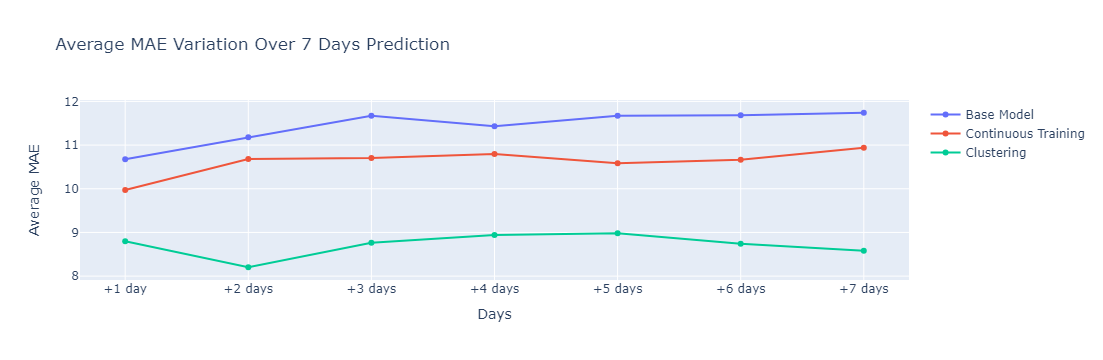

In [2]:
import plotly.graph_objs as go
import numpy as np

# Base Model data
mae_lr_base = [8.73, 9.32, 9.55, 9.62, 9.66, 9.83, 9.98]
mae_fcdnn_base = [10.23, 10.88, 12.11, 11.72, 12.19, 12.08, 12.53]
mae_svr_base = [8.73, 9.65, 9.67, 9.81, 9.80, 9.78, 9.99]
mae_rf_base = [10.94, 11.45, 11.27, 11.04, 10.60, 10.75, 10.75]
mae_rt_base = [11.06, 11.37, 12.80, 12.17, 12.25, 12.62, 12.16]
mae_elm_base = [14.35, 14.39, 14.64, 14.24, 15.53, 15.05, 15.03]

# Continuous Training data
mae_lr_ct = [8.72, 9.31, 9.57, 9.62, 9.65, 9.79, 9.94]
mae_fcdnn_ct = [11.76, 12.01, 12.13, 11.99, 12.20, 12.62, 12.96]
mae_svr_ct = [8.91, 9.36, 9.71, 9.76, 9.75, 9.86, 10.02]
mae_rf_ct = [9.84, 10.45, 10.41, 10.23, 9.73, 10.08, 10.42]
mae_rt_ct = [10.55, 11.57, 11.09, 12.71, 11.23, 11.34, 11.92]
mae_elm_ct = [10.05, 11.39, 11.30, 10.47, 10.95, 10.30, 10.37]

# Clustering data
mae_lr_cluster = [5.18, 5.28, 5.42, 5.52, 5.47, 5.63, 5.69]
mae_fcdnn_cluster = [9.64, 9.659, 9.663, 9.662, 9.64, 9.662, 9.659]
mae_svr_cluster = [9.52, 9.58, 9.59, 9.66, 9.80, 9.89, 9.91]
mae_rf_cluster = [7.09, 7.32, 7.23, 7.49, 7.54, 7.48, 7.47]
mae_rt_cluster = [8.36, 8.50, 8.45, 8.55, 8.76, 8.56, 8.49]
mae_elm_cluster = [12.99, 8.88, 12.22, 12.75, 12.68, 11.22, 10.27]

# Calculate average MAE for each operation
avg_mae_base = np.mean([mae_lr_base, mae_fcdnn_base, mae_svr_base, mae_rf_base, mae_rt_base, mae_elm_base], axis=0)
avg_mae_ct = np.mean([mae_lr_ct, mae_fcdnn_ct, mae_svr_ct, mae_rf_ct, mae_rt_ct, mae_elm_ct], axis=0)
avg_mae_cluster = np.mean([mae_lr_cluster, mae_fcdnn_cluster, mae_svr_cluster, mae_rf_cluster, mae_rt_cluster, mae_elm_cluster], axis=0)

# Days
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']

# Create traces
trace_base = go.Scatter(x=days, y=avg_mae_base, mode='lines+markers', name='Base Model')
trace_ct = go.Scatter(x=days, y=avg_mae_ct, mode='lines+markers', name='Continuous Training')
trace_cluster = go.Scatter(x=days, y=avg_mae_cluster, mode='lines+markers', name='Clustering')

# Create layout
layout = go.Layout(title='Average MAE Variation Over 7 Days Prediction',
                   xaxis=dict(title='Days'),
                   yaxis=dict(title='Average MAE'))

# Plot
fig = go.Figure(data=[trace_base, trace_ct, trace_cluster], layout=layout)
fig.show()



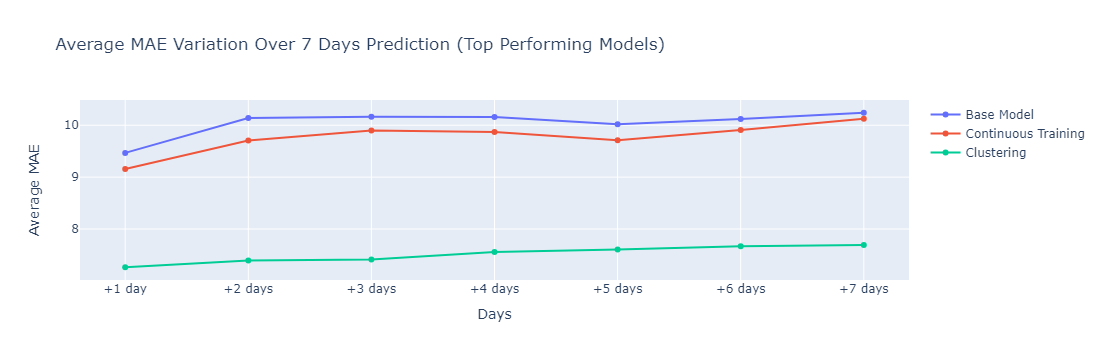

In [4]:
import plotly.graph_objs as go
import numpy as np

# Base Model data
mae_lr_base = [8.73, 9.32, 9.55, 9.62, 9.66, 9.83, 9.98]
mae_fcdnn_base = [10.23, 10.88, 12.11, 11.72, 12.19, 12.08, 12.53]
mae_svr_base = [8.73, 9.65, 9.67, 9.81, 9.80, 9.78, 9.99]
mae_rf_base = [10.94, 11.45, 11.27, 11.04, 10.60, 10.75, 10.75]
mae_rt_base = [11.06, 11.37, 12.80, 12.17, 12.25, 12.62, 12.16]
mae_elm_base = [14.35, 14.39, 14.64, 14.24, 15.53, 15.05, 15.03]

# Continuous Training data
mae_lr_ct = [8.72, 9.31, 9.57, 9.62, 9.65, 9.79, 9.94]
mae_fcdnn_ct = [11.76, 12.01, 12.13, 11.99, 12.20, 12.62, 12.96]
mae_svr_ct = [8.91, 9.36, 9.71, 9.76, 9.75, 9.86, 10.02]
mae_rf_ct = [9.84, 10.45, 10.41, 10.23, 9.73, 10.08, 10.42]
mae_rt_ct = [10.55, 11.57, 11.09, 12.71, 11.23, 11.34, 11.92]
mae_elm_ct = [10.05, 11.39, 11.30, 10.47, 10.95, 10.30, 10.37]

# Clustering data
mae_lr_cluster = [5.18, 5.28, 5.42, 5.52, 5.47, 5.63, 5.69]
mae_fcdnn_cluster = [9.64, 9.659, 9.663, 9.662, 9.64, 9.662, 9.659]
mae_svr_cluster = [9.52, 9.58, 9.59, 9.66, 9.80, 9.89, 9.91]
mae_rf_cluster = [7.09, 7.32, 7.23, 7.49, 7.54, 7.48, 7.47]
mae_rt_cluster = [8.36, 8.50, 8.45, 8.55, 8.76, 8.56, 8.49]
mae_elm_cluster = [12.99, 8.88, 12.22, 12.75, 12.68, 11.22, 10.27]

# Calculate average MAE for each operation
avg_mae_base = np.mean([mae_lr_base, mae_fcdnn_base, mae_svr_base, mae_rf_base, mae_rt_base, mae_elm_base], axis=0)
avg_mae_ct = np.mean([mae_lr_ct, mae_fcdnn_ct, mae_svr_ct, mae_rf_ct, mae_rt_ct, mae_elm_ct], axis=0)
avg_mae_cluster = np.mean([mae_lr_cluster, mae_fcdnn_cluster, mae_svr_cluster, mae_rf_cluster, mae_rt_cluster, mae_elm_cluster], axis=0)

# Find the top-performing models for each operation
top_models_base = [mae_lr_base, mae_svr_base, mae_rf_base]  # Assuming LR, SVR, and RF are top-performing for Base Model
top_models_ct = [mae_lr_ct, mae_svr_ct, mae_rf_ct]  # Assuming LR, SVR, and RF are top-performing for Continuous Training
top_models_cluster = [mae_lr_cluster, mae_svr_cluster, mae_rf_cluster]  # Assuming LR, SVR, and RF are top-performing for Clustering

# Calculate average MAE for top-performing models for each operation
avg_mae_top_base = np.mean(top_models_base, axis=0)
avg_mae_top_ct = np.mean(top_models_ct, axis=0)
avg_mae_top_cluster = np.mean(top_models_cluster, axis=0)

# Days
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']

# Create traces
trace_base = go.Scatter(x=days, y=avg_mae_top_base, mode='lines+markers', name='Base Model')
trace_ct = go.Scatter(x=days, y=avg_mae_top_ct, mode='lines+markers', name='Continuous Training')
trace_cluster = go.Scatter(x=days, y=avg_mae_top_cluster, mode='lines+markers', name='Clustering')

# Create layout
layout = go.Layout(title='Average MAE Variation Over 7 Days Prediction (Top Performing Models)',
                   xaxis=dict(title='Days'),
                   yaxis=dict(title='Average MAE'))

# Plot
fig = go.Figure(data=[trace_base, trace_ct, trace_cluster], layout=layout)
fig.show()


Training set shapes: (1034, 17) (1034, 7)
Testing set shapes: (444, 17) (444, 7)


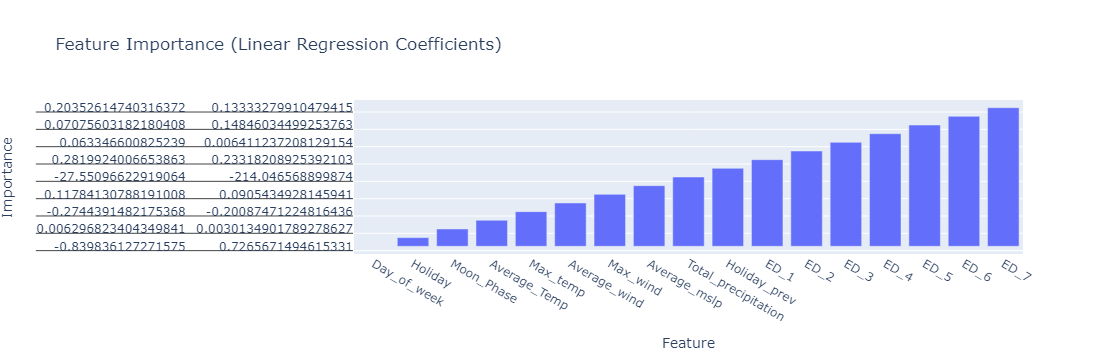

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming you have already preprocessed your data and obtained the feature matrix X and target variable y
# X should contain all the features except the target variables
# y should contain the target variables
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Here, test_size=0.3 means that 30% of the data will be used for testing, and random_state=42 ensures reproducibility

# Display the shapes of the training and testing sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Assuming X_train and y_train are your training features and target variables

# Get feature coefficients
feature_importance = model.coef_

# Create bar plot for feature importance
import plotly.graph_objs as go

fig = go.Figure(go.Bar(x=X.columns, y=feature_importance))
fig.update_layout(title='Feature Importance (Linear Regression Coefficients)', xaxis_title='Feature', yaxis_title='Importance')
fig.show()


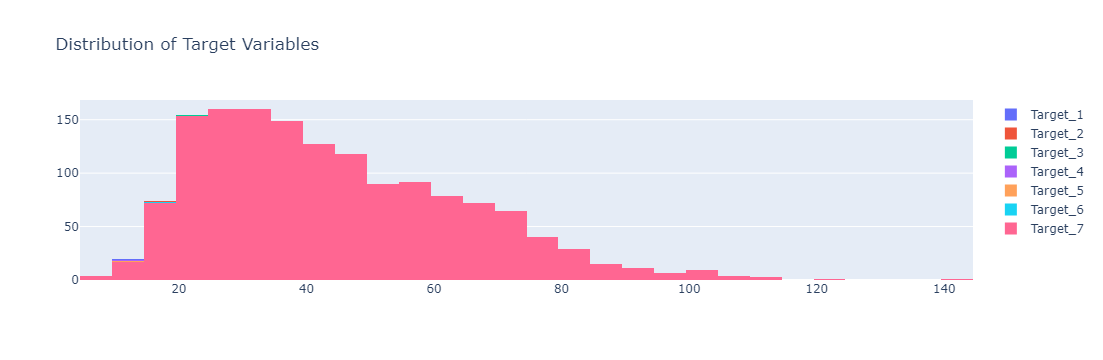

In [19]:
# Create histograms for each target variable
fig = go.Figure()
for target_col in y.columns:
    fig.add_trace(go.Histogram(x=y[target_col], name=target_col))
fig.update_layout(barmode='overlay', title='Distribution of Target Variables')
fig.show()


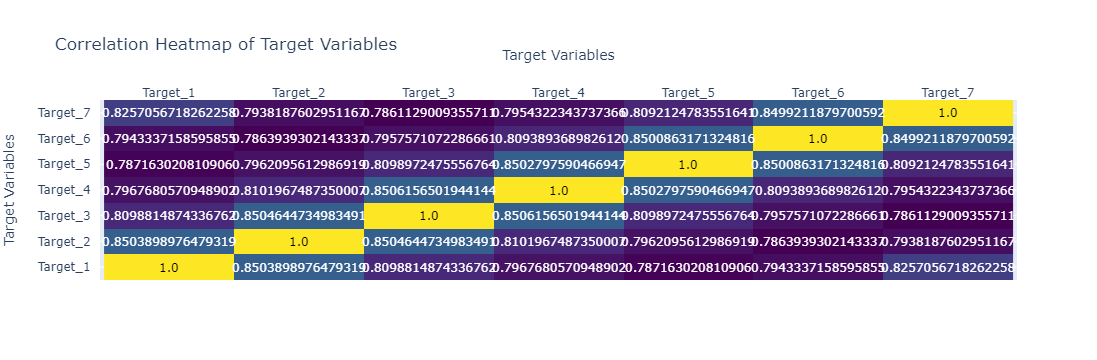

In [18]:
import plotly.figure_factory as ff

# Calculate correlation matrix for target variables
target_correlation_matrix = y.corr()

# Create heatmap for target variable correlation matrix
fig = ff.create_annotated_heatmap(z=target_correlation_matrix.values,
                                  x=list(target_correlation_matrix.columns),
                                  y=list(target_correlation_matrix.index),
                                  colorscale='Viridis')
fig.update_layout(title='Correlation Heatmap of Target Variables', xaxis_title='Target Variables', yaxis_title='Target Variables')
fig.show()
